## Regularyzacja

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from copy import deepcopy
import csv

In [2]:
def h_fun_multivariable(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return np.matmul(theta.T, X)

In [3]:
def computeDerivativeMultivariable(X, Y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    n,m = X.shape # number of features, number of examples
    
    diff = (h_fun_multivariable(X, theta) - Y)
    gradient = diff @ X.T
    gradient = gradient / m

    return gradient.T

In [4]:
def calculate_cost_multivariable(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    value = h_fun_multivariable(X, theta)
    return ((value - y) ** 2).sum() / (2*m)

In [5]:
# calculate_cost_multivariable(np.array([[0, 2, 2, 0]], dtype=np.float64), np.array([[0, 0, 0, 0]], dtype=np.float64), theta = np.array([[1]], dtype=np.float64))

In [6]:
def LinearRegression(X, Y, theta_in, learningRate, epsilon):
    i = 0
    costList = []
    derivatveList = []
    thetaList = []

    theta = deepcopy(theta_in)

    while(i < 2 or abs((costList[i-1] - costList[i-2])) > epsilon):
        derivative = computeDerivativeMultivariable(X, Y, theta)
        derivatveList.append(derivative)

        theta = theta - learningRate * derivative
        thetaList.append(theta)

        cost = calculate_cost_multivariable(X, Y, theta)
        costList.append(cost)
        
        if i < 10 or i % 100000 == 0:
            print(f"Iteration: {i}, Cost: {costList[-1]}")

        i += 1

    return [theta, i, costList]

In [7]:
def computeResult(theta, example, X_scale, y_scale):
    return np.matmul(theta.T, example/X_scale) * y_scale

In [8]:
def computeResultWithScaler(theta, example, x_scaler: StandardScaler):
    return np.matmul(theta.T, x_scaler.transform(example))

In [9]:
# with open("./lin_reg_training.csv") as f:
#     csv_reader = csv.reader(f)
#     examples = []
#     for row in csv_reader:
#         examples.append([float(cell) for cell in row])
#     data = np.array(examples)
#     print(data)
#     x = data[:, 0].T
#     y = data[:, 1].T
#     x = np.reshape(x, [1, -1])
#     y = np.reshape(y, [1, -1])
#     X = np.concatenate([np.ones([1, x.shape[1]]), x])
#     x = x.T
#     y = y.T
#     X = X.T

with open('./lin_reg_training.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    data_array = np.array(data, dtype=np.float64)
    x = data_array[:, 0]
    x = np.reshape(x, [1, -1])
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
    y = data_array[:, 1]
    y = np.reshape(y, [1, -1])
    x = x.T
    y = y.T
    X = X.T
    print(x)
    print(y)    

[[11.]
 [12.]
 [14.]
 [15.]
 [17.]
 [18.]
 [20.]
 [21.]
 [23.]
 [24.]]
[[139.66148459]
 [ 93.61152898]
 [147.53490822]
 [160.79332868]
 [257.75693508]
 [300.58686316]
 [377.37446403]
 [498.17725977]
 [669.0168867 ]
 [385.44267758]]


In [10]:
print(x.shape)
print(y.shape)
print(X.shape)

(10, 1)
(10, 1)
(10, 2)


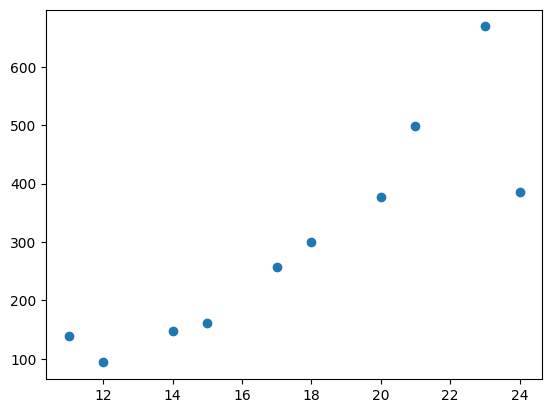

In [11]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [12]:
# x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
x_train_single_dim = x
y_train = y

In [14]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train_single_dim)
x_train_single_dim = standard_scaler.transform(x_train_single_dim)
print(x_train_single_dim)

[[-1.52153491]
 [-1.28745262]
 [-0.81928803]
 [-0.58520574]
 [-0.11704115]
 [ 0.11704115]
 [ 0.58520574]
 [ 0.81928803]
 [ 1.28745262]
 [ 1.52153491]]


In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train_single_dim)

In [16]:
print(x_train.shape)

(10, 7)


In [17]:
x_train = x_train.T
y_train = y_train.T

In [18]:
print(x_train.shape)
print(y_train.shape)

(7, 10)
(1, 10)


In [19]:
theta_in = np.zeros((x_train.shape[0], 1))
eps = 1e-8  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

theta, i, costList = LinearRegression(x_train, y_train, theta_in, alpha, eps)

Iteration: 0, Cost: 59246.153058737385
Iteration: 1, Cost: 57654.00058436142
Iteration: 2, Cost: 56183.67086904383
Iteration: 3, Cost: 54825.105670122095
Iteration: 4, Cost: 53569.09647632939
Iteration: 5, Cost: 52407.21194542317
Iteration: 6, Cost: 51331.731569566764
Iteration: 7, Cost: 50335.58503270759
Iteration: 8, Cost: 49412.29677033469
Iteration: 9, Cost: 48555.93528416233
Iteration: 100000, Cost: 118.99995036483685
Iteration: 200000, Cost: 73.02751191906198
Iteration: 300000, Cost: 62.513299086571045
Iteration: 400000, Cost: 59.21958276993348
Iteration: 500000, Cost: 58.03291122800596
Iteration: 600000, Cost: 57.58567660198755
Iteration: 700000, Cost: 57.41494404809411
Iteration: 800000, Cost: 57.349536367948964
Iteration: 900000, Cost: 57.3244546415941
Iteration: 1000000, Cost: 57.31483411316252
Iteration: 1100000, Cost: 57.31114373404218


In [20]:
temp_x_original = np.reshape(np.linspace(10, 24, 100), [-1, 1])
temp_x = standard_scaler.transform(temp_x_original)
temp_x = poly_features.transform(temp_x)
temp_x = temp_x.T
result_ = computeResult(theta, temp_x, 1, 1)

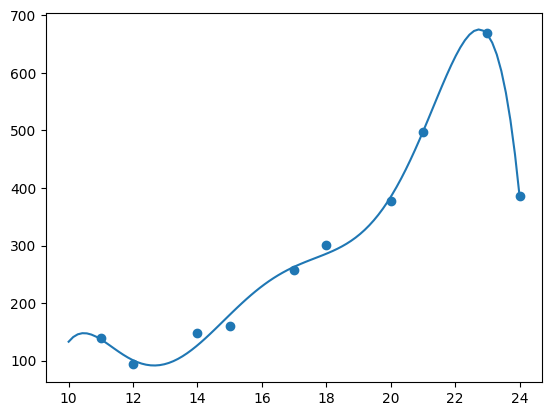

In [21]:
plt.figure()
plt.plot(temp_x_original, result_.T)
plt.scatter(x, y_train)
plt.show()

In [22]:
result = computeResult(theta, x_train, 1, 1)

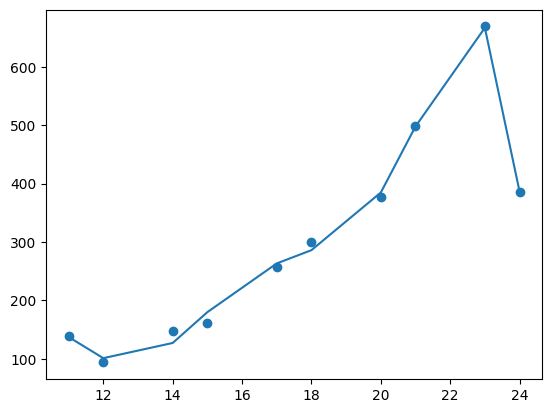

In [23]:
plt.figure()
plt.plot(standard_scaler.inverse_transform(np.reshape(x_train[1, :], [-1, 1])), result.T)
plt.scatter(x, y_train)
plt.show()

In [24]:
cost = calculate_cost_multivariable(x_train, y_train, theta)
print(cost)

57.309890765477874


In [25]:
with open('./lin_reg_test.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    data_array = np.array(data, dtype=np.float64)
    x_test = data_array[:, 0]
    x_test = np.reshape(x_test, [1, -1])
    # X = np.concatenate([np.ones([1, x.shape[1]]), x])
    y_test = data_array[:, 1]
    y_test = np.reshape(y_test, [1, -1])
    # x_test = x_test.T
    # y_test = y_test.T
    # X = X.T
    print(x_test)
    print(y_test)

[[10. 13. 16. 19. 22.]]
[[ 94.19154033 145.61594334 199.77782988 370.80898868 383.86842221]]


In [26]:
x_test_normalized = standard_scaler.transform(x_test.T)
x_test_variable = poly_features.transform(x_test_normalized)

In [27]:
cost = calculate_cost_multivariable(x_test_variable.T, y_test, theta)
print(cost)

6718.415861808947


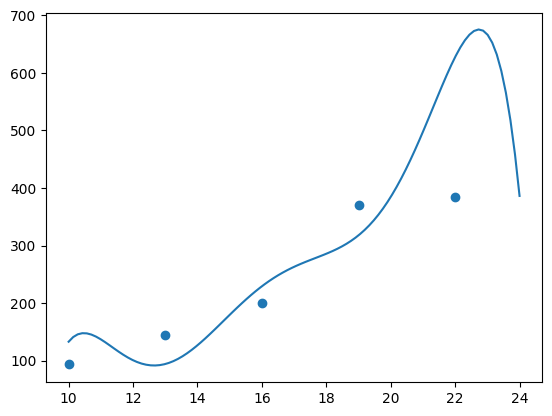

In [28]:
result_temp = computeResult(theta, x_test_variable.T, 1, 1)
plt.figure()
plt.scatter(x_test, y_test, )
plt.plot(temp_x_original, result_.T)
plt.show()

## Regularization

In [29]:
def calculate_cost_multivariable_regular(X, y, theta, lambda_):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    value = h_fun_multivariable(X, theta)
    cost = ((value - y) ** 2).sum() / (2*m)
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return cost + sum_of_thetas * lambda_ / (2 * m)

In [30]:
def computeDerivativeMultivariable(X, Y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    n,m = X.shape # number of features, number of examples
    
    diff = (h_fun_multivariable(X, theta) - Y)
    gradient = np.matmul(diff, X.T)
    gradient = gradient / m

    return gradient.T

In [31]:
def LinearRegression_regular(X, Y, theta_in, learningRate, epsilon, lambda_):
    n, m = X.shape # number of features, number of examples
    i = 0
    costList = []
    derivatveList = []
    thetaList = []

    theta = deepcopy(theta_in)

    while(i < 2 or abs((costList[i-1] - costList[i-2])) > epsilon):
        derivative = computeDerivativeMultivariable(X, Y, theta)
        derivatveList.append(derivative)

        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        theta = theta - learningRate * (derivative + lambda_ * theta_reg) / m

        thetaList.append(theta)

        cost = calculate_cost_multivariable(X, Y, theta)
        costList.append(cost)
        
        # if i < 10 or i % 10000 == 0:
        #     print(f"Iteration: {i}, Cost: {costList[-1]}")

        i += 1

    return [theta, i, costList]

In [32]:
def getCostRegular(x_train, y_train, x_test, y_test, lambda_):
    scaler = StandardScaler()
    scaler.fit(x_train)
    poly_features = PolynomialFeatures(degree=6)

    x_train_transformed = scaler.transform(x_train)
    x_train_poly = poly_features.fit_transform(x_train_transformed)
    x_train_poly = x_train_poly.T

    x_data = np.linspace(np.min([np.min(x_train), np.min(x_test)]), np.max([np.max(x_train), np.max(x_test)]), 100)
    x_data = np.reshape(x_data, (-1, 1))
    x_data_transformed = scaler.transform(x_data)
    x_data_poly = poly_features.transform(x_data_transformed)
    x_data_poly = x_data_poly.T

    x_test_transformed = scaler.transform(x_test)
    x_test_poly = poly_features.transform(x_test_transformed)
    x_test_poly = x_test_poly.T

    theta_in = np.zeros((x_train_poly.shape[0], 1))
    eps = 1e-5
    alpha = 0.001

    theta, i, costList = LinearRegression_regular(x_train_poly, y_train, theta_in, alpha, eps, lambda_)

    result_train = computeResult(theta, x_train_poly, 1, 1)
    result_data = computeResult(theta, x_data_poly, 1, 1)
    result_test = computeResult(theta, x_test_poly, 1, 1)

    plt.figure()
    plt.scatter(x_train.T, y_train)
    plt.plot(x_data, result_data.T)
    plt.scatter(x_test.T, y_test)
    plt.show()

    cost_training = calculate_cost_multivariable_regular(x_train_poly, y_train, theta, 0)
    cost_testing = calculate_cost_multivariable_regular(x_test_poly, y_test, theta, 0)

    return [cost_training, cost_testing]

In [33]:
with open('./lin_reg_training.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    data_array = np.array(data, dtype=np.float64)
    x = data_array[:, 0]
    x = np.reshape(x, [1, -1])
    y = data_array[:, 1]
    y = np.reshape(y, [1, -1])
    x_train = x.T
    y_train = y
    # print(x_train)
    # print(y_train)

with open('./lin_reg_test.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    data_array = np.array(data, dtype=np.float64)
    x_test = data_array[:, 0]
    x_test = np.reshape(x_test, [1, -1])
    x_test = x_test.T
    y_test = data_array[:, 1]
    y_test = np.reshape(y_test, [1, -1])
    # print(x_test)
    # print(y_test)    

lambda: 10


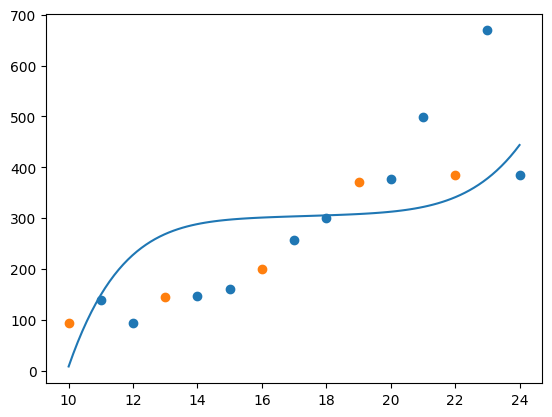

Train cost: 9100.279733508702, Test cost: 3859.229865682926
lambda: 1


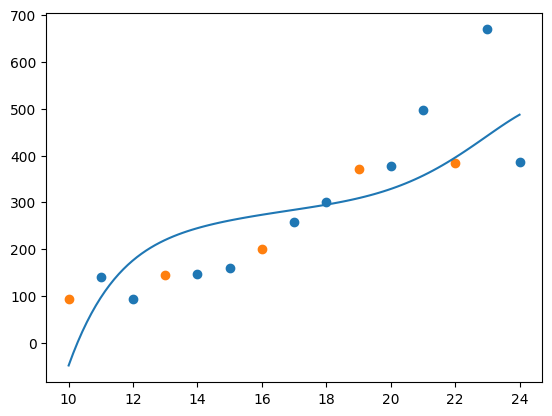

Train cost: 5658.191310262344, Test cost: 3517.5156052259617
lambda: 0.01


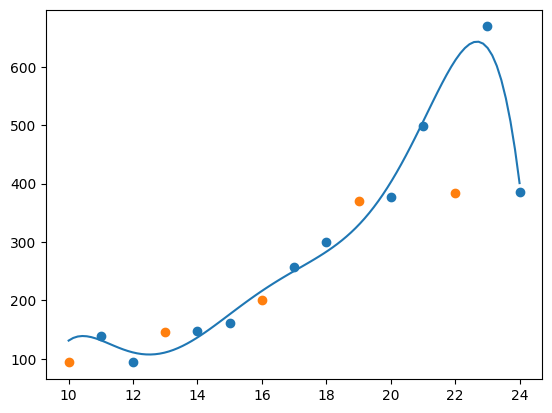

Train cost: 164.45790570687674, Test cost: 5607.437740973595
lambda: 0.001


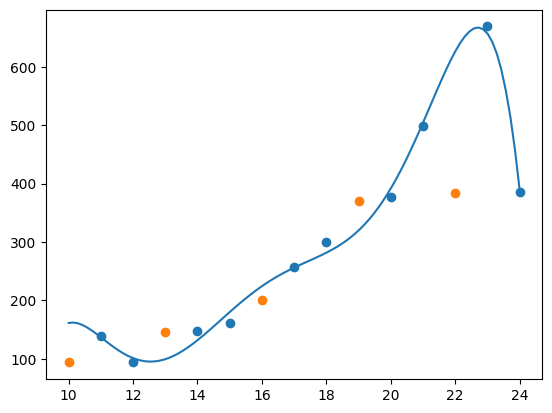

Train cost: 71.65667269997799, Test cost: 6850.451961638386
lambda: 0.0001


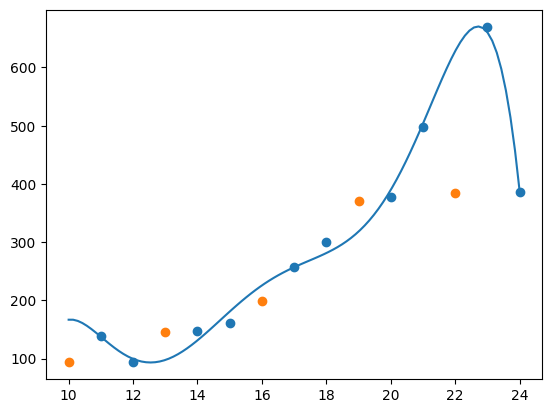

Train cost: 66.759469046063, Test cost: 7057.181218880088


In [34]:
lambda_list = [10, 1, 0.01, 0.001, 0.0001]
cost_list = []

for lambda_ in lambda_list:
    print(f"lambda: {lambda_}")
    cost_train, cost_test = getCostRegular(x_train, y_train, x_test, y_test, lambda_)
    cost_list.append((cost_train, cost_test))
    print(f"Train cost: {cost_train}, Test cost: {cost_test}")

In [35]:
temp = np.array([[2], [3], [4]], dtype=np.float64)
aha = np.concatenate([np.zeros((1, 1)), temp[1:, :]], axis=0)
print(aha)

[[0.]
 [3.]
 [4.]]


## Regresja Logistyczna

In [36]:
def sigmoid(y):
    value_temp =  1.0 / (1.0 + np.exp(-y))
    if np.any(value_temp == 1):
        value_temp = value_temp - np.finfo(y.dtype).eps
    if np.any(value_temp == 0):
        value_temp = value_temp + np.finfo(y.dtype).eps
    return value_temp

In [37]:
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    z = np.matmul(theta.T, X)
    h = sigmoid(z)

    return h

In [38]:
def calculate_cost(X, y, theta, lambda_):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = X.shape[1]
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    cost_ =  (y_1 + y_0).sum() / m
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return cost_ + sum_of_thetas * lambda_ / (2*m)

In [39]:
def computeDerivativeMultivariable(X, Y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    n,m = X.shape # number of features, number of examples
    
    diff = (h_fun(X, theta) - Y)
    gradient = np.matmul(diff, X.T)
    gradient = gradient / m

    return gradient.T

In [40]:
def LogisticRegression(X, Y, theta_in, learningRate, epsilon, lambda_):
    n, m = X.shape # number of features, number of examples
    i = 0
    costList = []
    derivatveList = []
    thetaList = []

    theta = deepcopy(theta_in)

    while(i < 2 or abs((costList[i-1] - costList[i-2])) > epsilon):
        derivative = computeDerivativeMultivariable(X, Y, theta)
        derivatveList.append(derivative)

        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        theta = theta - learningRate * (derivative + lambda_ * theta_reg) / m
        thetaList.append(theta)

        cost = calculate_cost(X, Y, theta, lambda_)
        costList.append(cost)
        
        # if(i < 10 or i % 100000 == 0):
        #     print(f"Iteration: {i}, Cost: {costList[-1]}")

        i += 1

    return [theta, i, costList]

In [41]:
def computeResult(theta, example, X_scale, y_scale):
    return sigmoid(np.matmul(theta.T, example/X_scale) * y_scale)

In [42]:
with open('./logi_reg_training.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    data_array = np.array(data, dtype=np.float64)
    x = data_array[:, 0:2]
    y = data_array[:, 2]
    x_train = x
    y_train = y

with open('./logi_reg_test.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    data_array = np.array(data, dtype=np.float64)
    x_test = data_array[:, 0:2]
    y_test = data_array[:, 2]
    x_test = x_test

In [43]:
def getCostRegular(x_train, y_train, x_test, y_test, lambda_):
    scaler = StandardScaler()
    scaler.fit(x_train)
    poly_features = PolynomialFeatures(degree=6)

    x_train_transformed = scaler.transform(x_train)
    x_train_poly = poly_features.fit_transform(x_train_transformed)
    x_train_poly = x_train_poly.T

    # x_data = np.linspace(np.min([np.min(x_train), np.min(x_test)]), np.max([np.max(x_train), np.max(x_test)]), 100)
    # x_data = np.reshape(x_data, (-1, 1))
    # x_data_transformed = scaler.transform(x_data)
    # x_data_poly = poly_features.transform(x_data_transformed)
    # x_data_poly = x_data_poly.T

    x_test_transformed = scaler.transform(x_test)
    x_test_poly = poly_features.transform(x_test_transformed)
    x_test_poly = x_test_poly.T

    theta_in = np.zeros((x_train_poly.shape[0], 1))
    eps = 1e-7
    alpha = 0.001

    theta, i, costList = LogisticRegression(x_train_poly, y_train, theta_in, alpha, eps, lambda_)

    result_train = computeResult(theta, x_train_poly, 1, 1)
    # result_data = computeResult(theta, x_data_poly, 1, 1)
    result_test = computeResult(theta, x_test_poly, 1, 1)
    
    # logistic regression
    value0_train = x_train[np.where(y_train == 0), :]
    value1_train = x_train[np.where(y_train == 1), :]
    value0_train = np.reshape(value0_train, (-1, 2))
    value1_train = np.reshape(value1_train, (-1, 2))
    
    value0_test = x_test[np.where(y_test == 0), :]
    value1_test = x_test[np.where(y_test == 1), :]
    value0_test = np.reshape(value0_test, (-1, 2))
    value1_test = np.reshape(value1_test, (-1, 2))
    
    ax = plt.figure()
    plt.scatter(value0_train[:, 0], value0_train[:, 1], marker='o')
    plt.scatter(value1_train[:, 0], value1_train[:, 1], marker='x')

    plt.scatter(value0_test[:, 0], value0_test[:, 1], marker='.')
    plt.scatter(value1_test[:, 0], value1_test[:, 1], marker='*')
    
    x1 = x_train[:, 0]
    x2 = x_train[:, 1]
    x1_range = np.linspace(x1.min(), x1.max(), 100)
    x2_range = np.linspace(x2.min(), x2.max(), 100)
    x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
    points = np.c_[x1x1.ravel(), x2x2.ravel()]
    x1x2_range_comb = scaler.transform(points)
    x1x2_range_comb = poly_features.transform(x1x2_range_comb)
    X_range_comb = x1x2_range_comb.T
    h_range_comb = h_fun(X_range_comb, theta)
    h_range_comb.shape = x1x1.shape
    plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
    
    ax.legend(["does not belong to a class - train", "belongs to a class - training", "does not belong to a class - test", "belong to a class - test"])
    
    plt.show()
    
    # plt.figure()
    # plt.scatter(x_train.T, y_train)
    # plt.plot(x_data, result_data.T)
    # plt.scatter(x_test.T, y_test)
    # plt.show()

    cost_training = calculate_cost(x_train_poly, y_train, theta, 0)
    cost_testing = calculate_cost(x_test_poly, y_test, theta, 0)

    return [cost_training, cost_testing]

lambda: 10


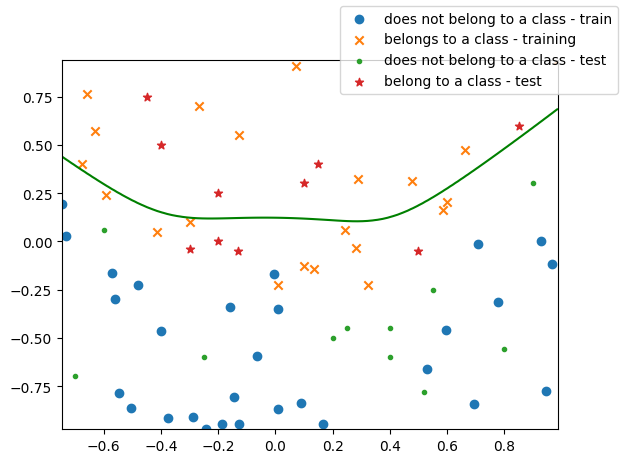

Train cost: 0.5194494806513366, Test cost: 0.5800021749096099
lambda: 1


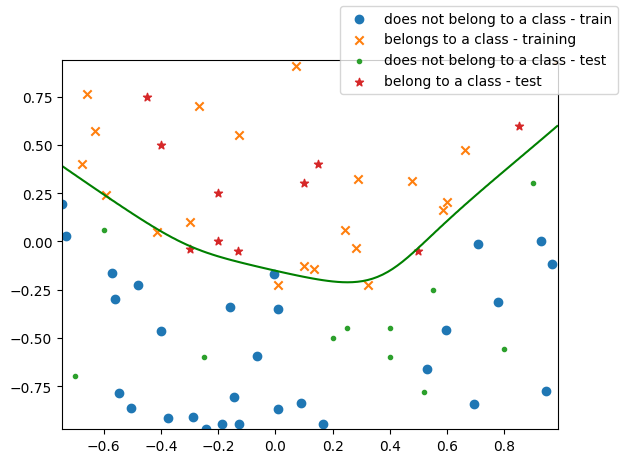

Train cost: 0.3572964083994913, Test cost: 0.45315277937902704
lambda: 0.01


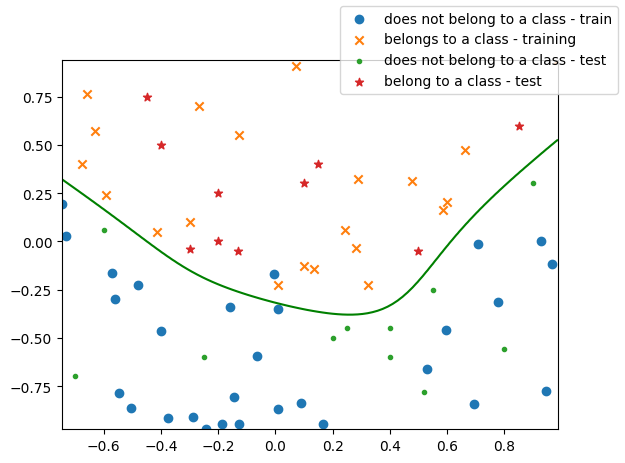

Train cost: 0.18514529932181423, Test cost: 0.2861200016236104
lambda: 0.001


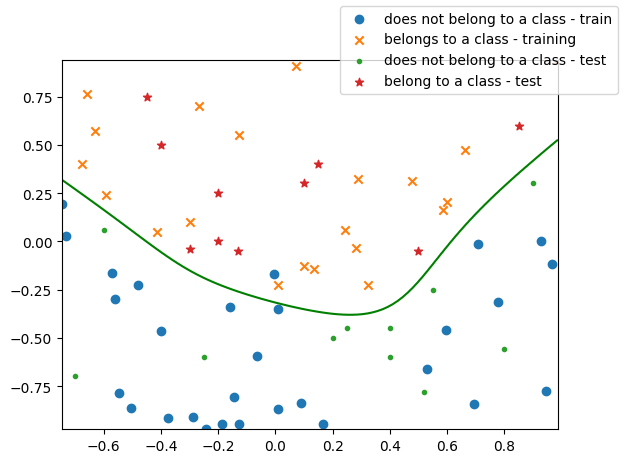

Train cost: 0.17780072494567384, Test cost: 0.27738437306790803
lambda: 0.0001


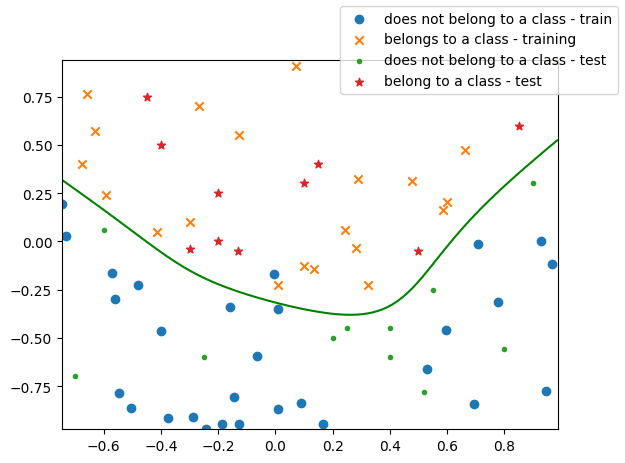

Train cost: 0.17702591664970543, Test cost: 0.2764484805754716


In [44]:
lambda_ = [10, 1, 0.5, 0.1, 0.05, 0.01, 0]
cost_list = []

for lambda_ in lambda_list:
    print(f"lambda: {lambda_}")
    cost_train, cost_test = getCostRegular(x_train, y_train, x_test, y_test, lambda_)
    cost_list.append((cost_train, cost_test))
    print(f"Train cost: {cost_train}, Test cost: {cost_test}")

## Logistic Regression Scikit Learn

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
 


In [46]:
data = load_iris()
x = data.data
y = data.target
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [47]:
log_regr = LogisticRegression(penalty=None)
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
report = classification_report(y_test, y_test_pred)
print(f"Train cost: {cost_train}")
print(f"Test cost: {cost_test}")
print(report)

Train cost: 0.04550645668061381
Test cost: 0.041030184250740176
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


In [48]:
data = load_iris()
x = data.data
y = data.target
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [49]:
poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test)

log_regr = LogisticRegression(penalty=None)
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
report = classification_report(y_test, y_test_pred)
print(f"Train cost: {cost_train}")
print(f"Test cost: {cost_test}")
print(report)

Train cost: 0.00032842616308278284
Test cost: 1.0816319766003033
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45


In [50]:
lambda_list = [100, 10, 1, 0.1, 0.01]

for lambda_ in lambda_list:
    data = load_iris()
    x = data.data
    y = data.target
     
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
    standard_scaler = StandardScaler()
    x_train = standard_scaler.fit_transform(x_train)
    x_test = standard_scaler.transform(x_test)
    
    poly_features = PolynomialFeatures(degree=6)
    x_train = poly_features.fit_transform(x_train)
    x_test = poly_features.transform(x_test)
    
    log_regr = LogisticRegression(penalty="l2", n_jobs = -1, C = lambda_, max_iter = 10000)
    log_regr.fit(x_train, y_train)
    y_train_probab = log_regr.predict_proba(x_train)
    y_test_probabs = log_regr.predict_proba(x_test)
    cost_train = log_loss(y_train, y_train_probab)
    cost_test = log_loss(y_test, y_test_probabs)
    y_test_pred = log_regr.predict(x_test)
    report = classification_report(y_test, y_test_pred)
    print(f"lambda: {lambda_}")
    print(f"Train cost: {cost_train}")
    print(f"Test cost: {cost_test}")
    print(report)

lambda: 100
Train cost: 0.0039309016839154
Test cost: 0.8551112961181714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45
lambda: 10
Train cost: 0.01767521046887275
Test cost: 0.8407350879425732
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45
lambda: 1
Train cost: 0.04644167541682519
Test cost: 0.06549710850943696
              precisi